In [1]:
cd ~/code/ctl/build/python

/Users/rhl/code/ctl/build/python


In [2]:
%matplotlib inline
import ctl
import itertools

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
def sphere_sample(N, dim=4):
    norm = np.random.normal
    normal_deviates = norm(size=(dim, N))
    radius = np.sqrt((normal_deviates**2).sum(axis=0))
    return (normal_deviates/radius).T

In [4]:
pts = np.array([[1.0,0,0],[-1,0,0], [0,1,0],[0,-1,0],[0,0,1],[0,0,-1]])
K = ctl.Simplicial_complex([ctl.Abstract_simplex(s.tolist()) for s in ConvexHull(pts).simplices])

In [5]:
def plot_2skel(X, K):
    X -= X.mean(axis=0)
    triangles = np.array([list(s) for (s,d) in K if s.dimension() == 2])
    rad = np.linalg.norm(X, axis=1)
    zen = np.arccos(X[:,-1] / rad)
    azi = np.arctan2(X[:,1], X[:,0])
    tris = Triangulation(zen, azi)
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X[:,0], X[:,1], X[:,2], triangles=triangles, cmap=plt.cm.bone)
    plt.show()


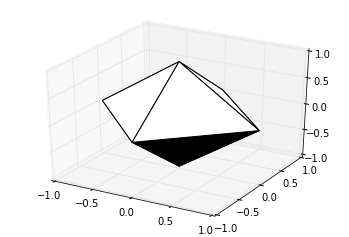

In [6]:
plot_2skel(pts,K)

In [7]:
for (i,x) in enumerate([1,2,3]):
    print i, x

0 1
1 2
2 3


In [8]:
cover1 = {ctl.Abstract_simplex([int(x) for x in cell]): int(np.dot(1*(np.sum([[pts[x,:]] for x in cell],axis=0)/3.0 > 0),(0,1.0,2))[0]) for (cell,d) in K if cell.dimension()==2}

In [9]:
cover = dict()
for (sigma, d) in K:
    cover[sigma]=list()
    for (tau,s) in cover1.iteritems():
        if (set(sigma).issubset(set(tau))) is True:
            if s not in cover[sigma]:
                cover[sigma].append(s)
            
blowup = ctl.Prod_simplicial_complex()
for (sigma,taulst) in cover.iteritems():
    tau = ctl.Abstract_simplex(set(taulst))
    cell = ctl.Simplex_product(sigma, tau)
    blowup.insert_closed_cell(cell)

In [10]:
for (k,v) in cover.iteritems():
    print k.__str__(), "-->", v

[5] --> [1, 0]
[1, 5] --> [0, 1]
[0, 2, 4] --> [3]
[1, 2, 4] --> [3]
[0] --> [1, 3, 0, 2]
[3, 4] --> [2]
[1, 3, 4] --> [2]
[0, 3, 4] --> [2]
[1, 4] --> [3, 2]
[4] --> [3, 2]
[1] --> [3, 0, 1, 2]
[0, 2] --> [1, 3]
[0, 5] --> [1, 0]
[1, 3, 5] --> [0]
[0, 4] --> [3, 2]
[2, 4] --> [3]
[2] --> [3, 1]
[0, 3, 5] --> [0]
[1, 2, 5] --> [1]
[0, 3] --> [0, 2]
[3] --> [0, 2]
[3, 5] --> [0]
[1, 3] --> [0, 2]
[0, 2, 5] --> [1]
[2, 5] --> [1]
[1, 2] --> [3, 1]


In [11]:
def ss_col_i(blowup, i): 
    lst = [cell for (cell,data) in blowup if cell.second_cell().dimension() == i]
    sc = ctl.Prod_simplicial_complex()
    bd = ctl.Simplex_boundary()
    for pd in lst:
        sigma = pd.first_cell()
        tau = pd.second_cell()
        for rho in bd(sigma):
            sc.insert_open_cell(ctl.Simplex_product(rho.cell(), tau))
        sc.insert_open_cell(ctl.Simplex_product(sigma, tau))
    return sc

In [12]:
ctl.homology(blowup)

[1L, 0L, 1L, 0L]

In [13]:
sc0 = ss_col_i(blowup, 0)
sc1 =  ss_col_i(blowup, 1)
sc2 = ss_col_i(blowup, 2)
sc3 = ss_col_i(blowup, 3)

In [47]:
cmpr = lambda a,b: -1*(a.second_cell()<b.second_cell()) or (a.second_cell()==b.second_cell() and a.first_cell() < b.first_cell())
def print_complex(sc):
    print len(sc)
    print sc.dimension()
    dim_groups = {}
    for dim in xrange(0,int(sc.dimension())+1):
        dim_groups[dim] = []
    for (elt,d) in sc:
        dim_groups[elt.dimension()].append(elt)
    for d in sorted(dim_groups.keys()):
        for (i,elt) in enumerate(sorted(dim_groups[d], cmp=cmpr)):
            print i,elt.__str__(), " "
        print " "
    print "----"
print print_complex(sc0)
print print_complex(sc1)
print print_complex(sc2)
print print_complex(sc3)

44
2
0 [5]⊗[0]  
1 [1]⊗[0]  
2 [0]⊗[0]  
3 [3]⊗[0]  
4 [1]⊗[1]  
5 [2]⊗[1]  
6 [0]⊗[1]  
7 [5]⊗[1]  
8 [0]⊗[2]  
9 [3]⊗[2]  
10 [1]⊗[2]  
11 [4]⊗[2]  
12 [4]⊗[3]  
13 [2]⊗[3]  
14 [1]⊗[3]  
15 [0]⊗[3]  
 
0 [0, 3]⊗[0]  
1 [1, 3]⊗[0]  
2 [0, 5]⊗[0]  
3 [1, 5]⊗[0]  
4 [3, 5]⊗[0]  
5 [0, 2]⊗[1]  
6 [0, 5]⊗[1]  
7 [1, 5]⊗[1]  
8 [1, 2]⊗[1]  
9 [2, 5]⊗[1]  
10 [1, 3]⊗[2]  
11 [1, 4]⊗[2]  
12 [3, 4]⊗[2]  
13 [0, 4]⊗[2]  
14 [0, 3]⊗[2]  
15 [2, 4]⊗[3]  
16 [0, 2]⊗[3]  
17 [1, 4]⊗[3]  
18 [0, 4]⊗[3]  
19 [1, 2]⊗[3]  
 
0 [1, 3, 5]⊗[0]  
1 [0, 3, 5]⊗[0]  
2 [0, 2, 5]⊗[1]  
3 [1, 2, 5]⊗[1]  
4 [1, 3, 4]⊗[2]  
5 [0, 3, 4]⊗[2]  
6 [0, 2, 4]⊗[3]  
7 [1, 2, 4]⊗[3]  
 
----
None
24
2
 
0 [5]⊗[0, 1]  
1 [1]⊗[0, 1]  
2 [0]⊗[0, 1]  
3 [1]⊗[0, 2]  
4 [0]⊗[0, 2]  
5 [3]⊗[0, 2]  
6 [0]⊗[0, 3]  
7 [1]⊗[0, 3]  
8 [0]⊗[1, 2]  
9 [1]⊗[1, 2]  
10 [0]⊗[1, 3]  
11 [1]⊗[1, 3]  
12 [2]⊗[1, 3]  
13 [1]⊗[2, 3]  
14 [4]⊗[2, 3]  
15 [0]⊗[2, 3]  
 
0 [1, 5]⊗[0, 1]  
1 [0, 5]⊗[0, 1]  
2 [0, 3]⊗[0, 2]  
3 [1, 3]⊗[0, 2]  


In [15]:
def factor_complex(cmplx):
    f = ctl.Simplicial_complex()
    for (pd, d) in cmplx:
        f.insert_open_cell(pd.first_cell())
    return f

In [46]:
(bti0, chains0) = ctl.homology(ctl.Simplicial_complex([c.first_cell() for (c, d) in sc0 if c.second_cell().front() == 0]), True)
print bti0

(bti1, chains1) = ctl.homology(ctl.Simplicial_complex([c.first_cell() for (c, d) in sc1 if set([0,2]).issubset(set(c.first_cell()))]), True)
print bti1


[1L, 0L, 0L]
[1L, 0L]


In [45]:
(bti0, chains0) =  ctl.homology(ctl.Prod_simplicial_complex([c for (c,d) in sc0]), True)
(bti1, chains1) =  ctl.homology(ctl.Prod_simplicial_complex([c for (c,d) in sc1]), True)
(bti2, chains2) =  ctl.homology(ctl.Prod_simplicial_complex([c for (c,d) in sc2]), True)
(bti3, chains3) =  ctl.homology(ctl.Prod_simplicial_complex([c for (c,d) in sc3]), True)
print bti0
print bti1
print bti2
print bti3

[4L, 0L, 0L]
[1L, 9L, 0L]
[2L, 0L, 2L]
[2L, 0L, 0L, 0L]


In [23]:
def print_generators(chains):
    #for i in xrange(0,3):
        for gen in chains:
            #if gen[0].cell().first_cell().dimension() == i:
                plus=""
                for t in gen:
                    s = t.cell()
                    print plus + s.__str__(),
                    plus = " + "
                print ""

In [24]:
print_generators(chains1)

[0] 
[0, 2]  + [0, 3]  + [1, 2]  + [1, 3] 
[0, 2]  + [0, 4]  + [1, 2]  + [1, 4] 
[0, 2]  + [0, 5]  + [1, 2]  + [1, 5] 


In [ ]:
print_generators(chains0)
print "----"
print_generators(chains1)
print "----"
print_generators(chains2)
print "----"
print_generators(chains3)

In [ ]:
def plot_2skel(X, K):
    X -= X.mean(axis=0)
    triangles = np.array([list(s.first_cell()) for (s,d) in K if s.dimension() == 2])
    rad = np.linalg.norm(X, axis=1)
    zen = np.arccos(X[:,-1] / rad)
    azi = np.arctan2(X[:,1], X[:,0])
    tris = Triangulation(zen, azi)
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X[:,0], X[:,1], X[:,2], triangles=triangles)#, cmap=plt.cm.bone)
    plt.show()

In [ ]:
plot_2skel(pts, sc1)

In [ ]:
plot_2skel(D, KY)

In [ ]:
plot_2skel(D, KI)

In [ ]:
ctl.homology(KX)

In [ ]:
ctl.homology(KY)

In [ ]:
ctl.homology(KI)

In [ ]:
Kcheck = ctl.Simplicial_complex()
for (s,d) in KX:
    Kcheck.insert_open_cell(s)
for (s,d) in KY:
    Kcheck.insert_open_cell(s)
for (s,d) in KI:
    Kcheck.insert_open_cell(s)
print Kcheck.is_closed()
ctl.homology(Kcheck)